# Data Cleaning

Data cleaning is the process of preparing data for analysis / ML / DP by removing or modifying data that is incorrect , incomplete , irrelevant , duplicated or improperly formatted .

* Handling Missing Data
* Outlier Detection and Handling
* Data Scaling and Transformation
* Encoding Categorical Varibles
* Handling Duplicates
* Dealing with Inconsistent Data

# Missing values

In [3]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\covid_toy.csv")
df.head(5)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,NaN
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [14]:
df.isnull()

,age,gender,fever,cough,city,has_covid
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False


In [15]:
df.isnull().sum()

age           0
gender        2
fever        10
cough         3
city          3
has_covid     1
dtype: int64

In [16]:
df.shape

(100, 6)

In [17]:
df.shape[0]

100

In [18]:
(df.isnull().sum()/df.shape[0])*100

# it is show the pertentage of missings values

age           0.0
gender        2.0
fever        10.0
cough         3.0
city          3.0
has_covid     1.0
dtype: float64

In [21]:
df.isnull().sum().sum()

# total kitni missing values hai

19

In [29]:
100*(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))

3.166666666666667

In [30]:
df.notnull().sum()

age          100
gender        98
fever         90
cough         97
city          97
has_covid     99
dtype: int64

In [31]:
df.notnull().sum().sum()

581

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

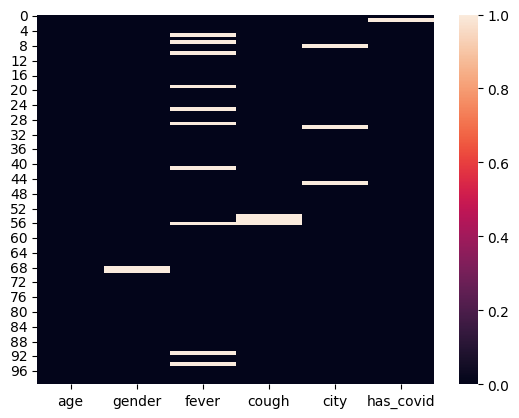

In [35]:
sns.heatmap(df.isnull())
plt.show()

# mising value graph

# Handling Missing Values (Dropping)

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\train.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,0,A/5 21171,7.250,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,NaN,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,NaN,0,STON/O2. 3101282,7.925,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1.0,0,113803,53.100,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.050,NaN,S


In [22]:
dataset.shape

(891, 12)

In [24]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Cabin          687
Embarked         5
dtype: int64

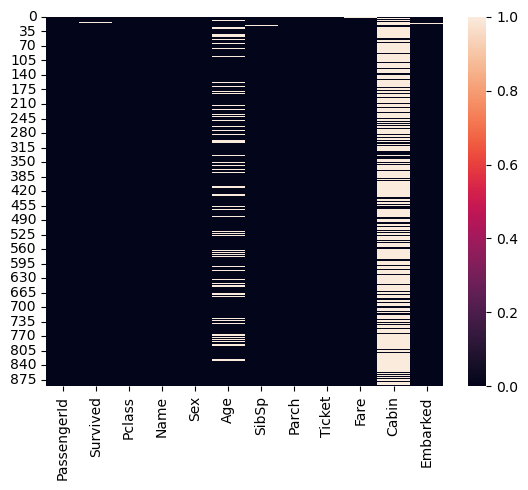

In [26]:
sns.heatmap(dataset.isnull())
plt.show()

In [30]:
# if hame column hatana ho to
dataset.drop(columns=["Cabin"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,0,A/5 21171,7.250,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,NaN,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,NaN,0,STON/O2. 3101282,7.925,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1.0,0,113803,53.100,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.050,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.000,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2,W./C. 6607,23.450,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.000,C


In [32]:

dataset.drop(columns=["Cabin"],inplace=True)
# inplace se original data me change ho jayga

In [36]:
dataset.shape  # 12==>11

(891, 11)

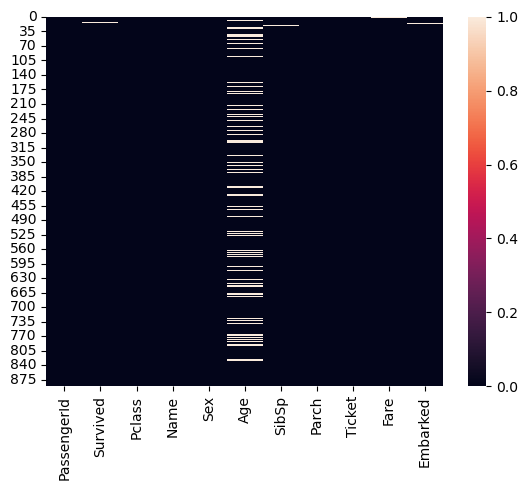

In [40]:
sns.heatmap(dataset.isnull())
plt.show()# cabin column hat gya hai

In [44]:
dataset.dropna()

# hmari NAN wali row ko hata deta hai but yah bhi nya data set bna ke deta hai

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0,17463,51.8625,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1,PP 9549,16.7000,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0,113783,26.5500,S
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0.0,0,A/5. 2151,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5,382652,29.1250,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0000,C


In [46]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Embarked         5
dtype: int64

In [48]:
dataset.dropna(inplace=True) # orignal me hi change kr deta hai

In [50]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

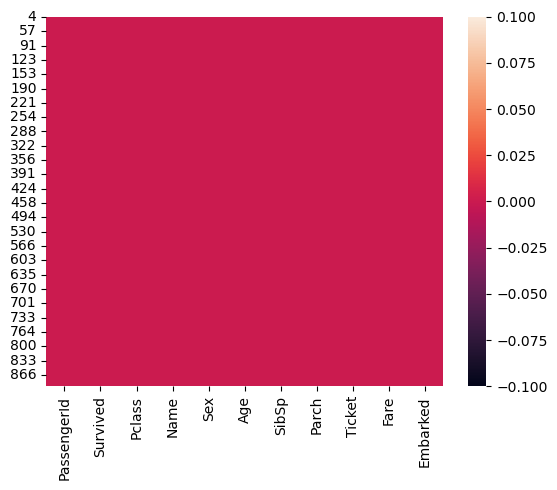

In [52]:
sns.heatmap(dataset.isnull())
plt.show()

In [54]:
dataset.shape

(697, 11)

In [58]:
((891-697)/891)*100  # hmanse estna data remove kiya hai

21.773288439955106

# Missing Value Fills

In [99]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\train.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",NaN,NaN,NaN,0,A/5 21171,7.250,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0,PC 17599,NaN,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,NaN,0,STON/O2. 3101282,7.925,NaN,S
3,4,1.0,1,NaN,NaN,NaN,1.0,0,113803,53.100,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.050,NaN,S


In [63]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Cabin          687
Embarked         5
dtype: int64

In [65]:
dataset.fillna(302012)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,302012.0,302012.0,0,A/5 21171,7.250,302012,302012
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,302012.000,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,302012.0,0,STON/O2. 3101282,7.925,302012,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,302012.0,1.0,0,113803,53.100,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.050,302012,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.000,302012,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,302012.0,1.0,2,W./C. 6607,23.450,302012,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.000,C148,C


In [71]:
dataset.fillna(method="bfill",axis=1)
# yah piche se fill krta hai collumn vise

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19832\244483391.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill",axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,0,0,0,A/5 21171,7.25,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,C85,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1.0,0,113803,53.1,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.05,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0,S,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1.0,2,W./C. 6607,23.45,S,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0,C148,C


In [73]:
dataset.fillna(method="ffill",axis=1)
# yah aage se fil krta hai collmn vise

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19832\364034928.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="ffill",axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,male,male,0,A/5 21171,7.25,7.25,7.25
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,PC 17599,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,26.0,0,STON/O2. 3101282,7.925,7.925,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,female,1.0,0,113803,53.1,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.05,8.05,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0,13.0,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,female,1.0,2,W./C. 6607,23.45,23.45,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0,C148,C


# mod Filling

esme jo data sabse jyada repeat hota hai wo hi fill krte hai

object type data fill krna

In [79]:
dataset["Sex"].mode()

0    male
Name: Sex, dtype: object

In [83]:
x=dataset["Sex"].mode()[0]
print(x)

male


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     888 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          884 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        887 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 83.7+ KB


In [85]:
dataset["Sex"].fillna(x)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [16]:
dataset["Sex"].fillna(dataset["Sex"].mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23420\2768257328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Sex"].fillna(dataset["Sex"].mode()[0],inplace=True)


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     888 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        887 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 83.7+ KB


In [20]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             2
Sex              0
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Cabin          687
Embarked         5
dtype: int64

In [26]:
dataset.select_dtypes(include="object")
# yah only object type wale dataset hi lega

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,NaN,male,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [28]:
dataset.select_dtypes(include="object").isnull().sum()

Name          2
Sex           0
Ticket        0
Cabin       687
Embarked      5
dtype: int64

In [31]:
dataset.select_dtypes(include="object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [37]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23420\2262683910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace=True)


In [39]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Cabin            0
Embarked         0
dtype: int64

# Handling Missing Values (Scikit-Learn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\train.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",NaN,NaN,NaN,0,A/5 21171,7.250,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0,PC 17599,NaN,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,NaN,0,STON/O2. 3101282,7.925,NaN,S


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             2
Sex              7
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Cabin          687
Embarked         5
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     888 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          884 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        887 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 83.7+ KB


In [14]:
dataset.select_dtypes(include="float64").columns

Index(['Survived', 'Age', 'SibSp', 'Fare'], dtype='object')

In [16]:
from sklearn.impute import SimpleImputer

In [28]:
si=SimpleImputer(strategy="mean")
arry=si.fit_transform(dataset[["Survived", "Age", "SibSp", "Fare"]])
print(arry)

[[ 0.         29.73967606  0.52085682  7.25      ]
 [ 1.         38.          1.         32.26613928]
 [ 1.         26.          0.52085682  7.925     ]
 ...
 [ 0.         29.73967606  1.         23.45      ]
 [ 1.         26.          0.         30.        ]
 [ 0.         32.          0.          7.75      ]]


In [36]:
new_dataset=pd.DataFrame(arry,columns=dataset.select_dtypes(include="float64").columns)
# missing value fill ho gyi dataframe me
print(new_dataset)

     Survived        Age     SibSp       Fare
0         0.0  29.739676  0.520857   7.250000
1         1.0  38.000000  1.000000  32.266139
2         1.0  26.000000  0.520857   7.925000
3         1.0  29.739676  1.000000  53.100000
4         0.0  35.000000  0.000000   8.050000
..        ...        ...       ...        ...
886       0.0  27.000000  0.000000  13.000000
887       1.0  19.000000  0.000000  30.000000
888       0.0  29.739676  1.000000  23.450000
889       1.0  26.000000  0.000000  30.000000
890       0.0  32.000000  0.000000   7.750000

[891 rows x 4 columns]


In [38]:
new_dataset.isnull().sum()

Survived    0
Age         0
SibSp       0
Fare        0
dtype: int64

In [42]:
dataset["Age"].mean()
# yah fill ho jayga missing value hai age me wha

29.739676056338027

# One Hot Encoding

In [45]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\train.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",NaN,NaN,NaN,0,A/5 21171,7.250,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0,PC 17599,NaN,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,NaN,0,STON/O2. 3101282,7.925,NaN,S


In [47]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             2
Sex              7
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Cabin          687
Embarked         5
dtype: int64

In [51]:
dataset["Sex"].fillna(dataset["Sex"].mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17424\2768257328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Sex"].fillna(dataset["Sex"].mode()[0],inplace=True)


In [53]:
dataset.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             2
Sex              0
Age            181
SibSp            4
Parch            0
Ticket           0
Fare             5
Cabin          687
Embarked         5
dtype: int64

In [59]:
en_data=dataset[["Sex"]]



In [63]:
en_data.sample(5)

,Sex
428,male
280,male
594,male
399,female
689,female


In [65]:
pd.get_dummies(en_data)

,Sex_female,Sex_male
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [67]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sex_female  891 non-null    bool 
 1   Sex_male    891 non-null    bool 
dtypes: bool(2)
memory usage: 1.9 KB


In [69]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
ohe=OneHotEncoder()
ar=ohe.fit_transform(en_data).toarray()
print(ar)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [81]:
pd.DataFrame(ar,columns=["girl","male"])

,girl,male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [83]:
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data).toarray()
print(ar)

[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.

In [85]:
pd.DataFrame(ar,columns=["male"])

,male
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0
